# Question 1

Lookup table length: 256


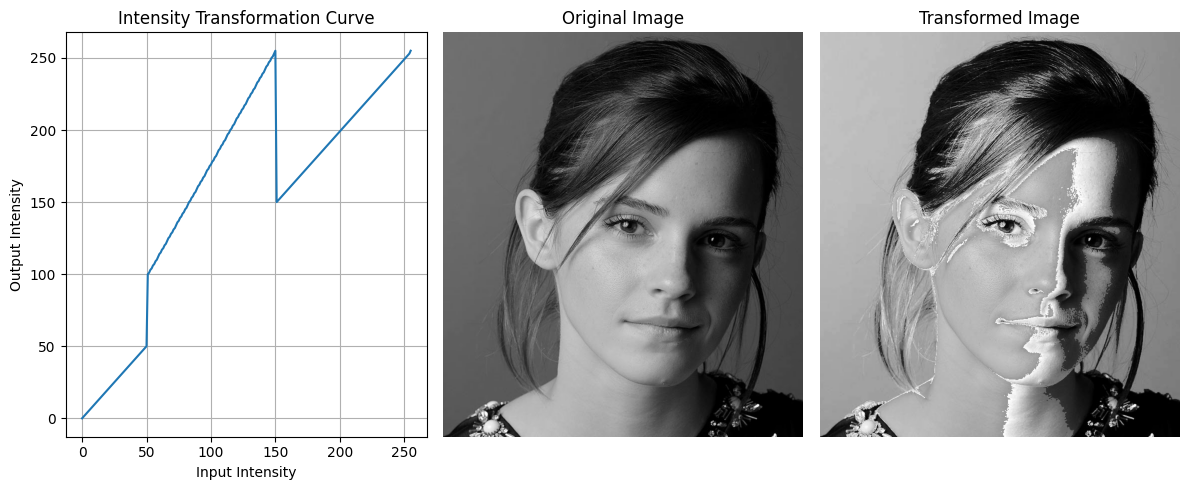

In [83]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# 1. Define control points for transformation
# --------------------
# Format: (input_intensity, output_intensity)
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])  # Example breakpoints from Fig. 1a

# --------------------
# 2. Build the lookup table
# --------------------
t1 = np.linspace(0, c[0,1], c[0,0] + 1).astype('uint8')  # 0 → 100 maps to 0 → 50
t2 = np.linspace(c[0,1], c[1,1], c[1,0] - c[0,0]).astype('uint8')  # 101 → 150 maps to 51 → 200
t3 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')  # 101 → 150 maps to 51 → 200
t4 = np.linspace(c[2,1], c[3,1], c[3,0] - c[2,0]).astype('uint8')  # 101 → 150 maps to 51 → 200
t5 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')  # 151 → 255 maps to 201 → 255

transform = np.concatenate((t1, t2, t3, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

print("Lookup table length:", len(transform))  # Should be 256

# --------------------
# 3. Read the image (grayscale)
# --------------------
img_orig = cv.imread('assets/emma.jpg', cv.IMREAD_GRAYSCALE)

# --------------------
# 4. Apply LUT transformation
# --------------------
image_transformed = cv.LUT(img_orig, transform)

# --------------------
# 5. Plot transformation curve
# --------------------
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.plot(np.arange(256), transform)
plt.title("Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)

# --------------------
# 6. Show original and transformed images
# --------------------
plt.subplot(1,3,2)
plt.imshow(img_orig, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_transformed, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.tight_layout()
plt.show()





# Question 2

Lookup table length: 256
Lookup table length: 256


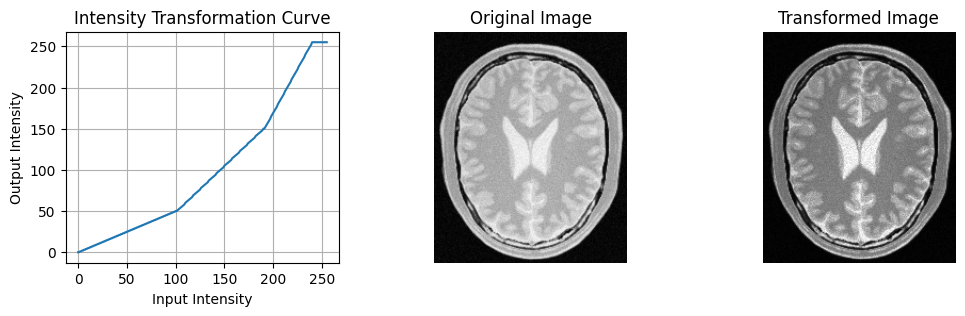

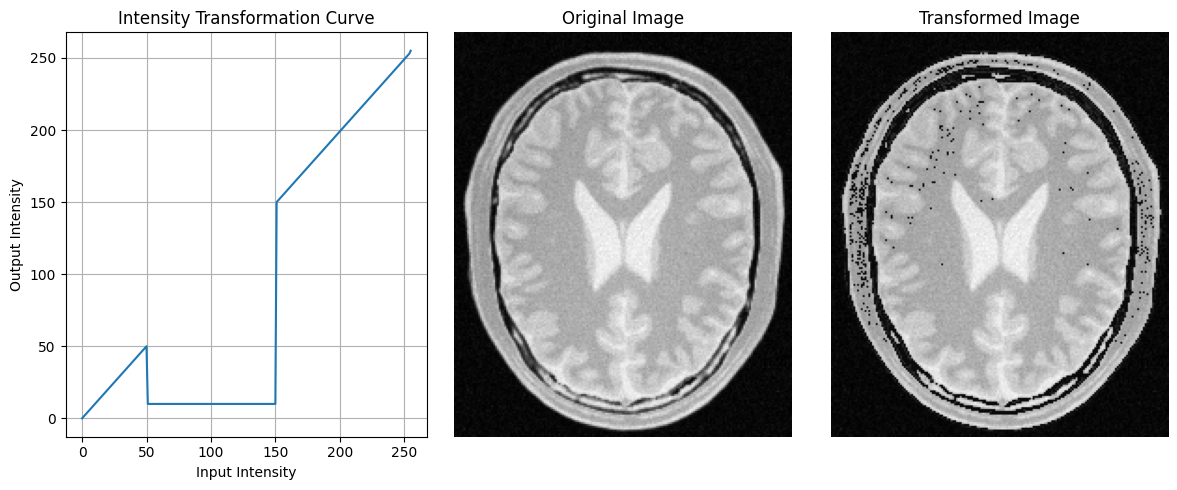

In [84]:

# --------------------
# 1. Define control points for transformation
# --------------------
# Format: (input_intensity, output_intensity)
c1 = np.array([(100, 50), (190, 150), (240, 255),(255, 255)])  # Example breakpoints from Fig. 1a
c2 = np.array([(50, 50), (50, 10), (150, 10), (150, 150), (255, 255)])  # Example breakpoints from Fig. 1a

# --------------------
# 2. Build the lookup table
# --------------------
t1 = np.linspace(0, c1[0,1], c1[0,0] + 1).astype('uint8')  # 0 → 100 maps to 0 → 50
t2 = np.linspace(c1[0,1], c1[1,1], c1[1,0] - c1[0,0]).astype('uint8')  # 101 → 150 maps to 51 → 200
t3 = np.linspace(c1[1,1], c1[2,1], c1[2,0] - c1[1,0]).astype('uint8')  # 101 → 150 maps to 51 → 200
t4 = np.linspace(c1[2,1], 255, 255 - c1[2,0]).astype('uint8')  # 151 → 255 maps to 201 → 255

t6 = np.linspace(0, c2[0,1], c2[0,0] + 1).astype('uint8')  # 0 → 100 maps to 0 → 50
t7 = np.linspace(c2[0,1], c2[1,1], c2[1,0] - c2[0,0]).astype('uint8')  # 101 → 150 maps to 51 → 200
t8 = np.linspace(c2[1,1], c2[2,1], c2[2,0] - c2[1,0]).astype('uint8')  # 101 → 150 maps to 51 → 200
t9 = np.linspace(c2[2,1], c2[3,1], c2[3,0] - c2[2,0]).astype('uint8')  # 101 → 150 maps to 51 → 200
t10 = np.linspace(c2[3,1], 255, 255 - c2[3,0]).astype('uint8')  # 151 → 255 maps to 201 → 255

transform1 = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
transform1 = np.concatenate((transform1, t4), axis=0).astype('uint8')

transform2 = np.concatenate((t6, t7, t8, t9), axis=0).astype('uint8')
transform2 = np.concatenate((transform2, t10), axis=0).astype('uint8')

print("Lookup table length:", len(transform1))  # Should be 256
print("Lookup table length:", len(transform2))  # Should be 256

# --------------------
# 3. Read the image (grayscale)
# --------------------
img_orig = cv.imread('assets/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# --------------------
# 4. Apply LUT transformation
# --------------------
image_transformed1 = cv.LUT(img_orig, transform1)
image_transformed2 = cv.LUT(img_orig, transform2)

# --------------------
# 5. Plot transformation curve
# --------------------
plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.plot(np.arange(256), transform1)
plt.title("Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)

plt.subplot(1,3,2)
plt.imshow(img_orig, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_transformed1, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')


plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.plot(np.arange(256), transform2)
plt.title("Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
# --------------------
# 6. Show original and transformed images
# --------------------

plt.subplot(1,3,2)
plt.imshow(img_orig, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_transformed2, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# Question 3

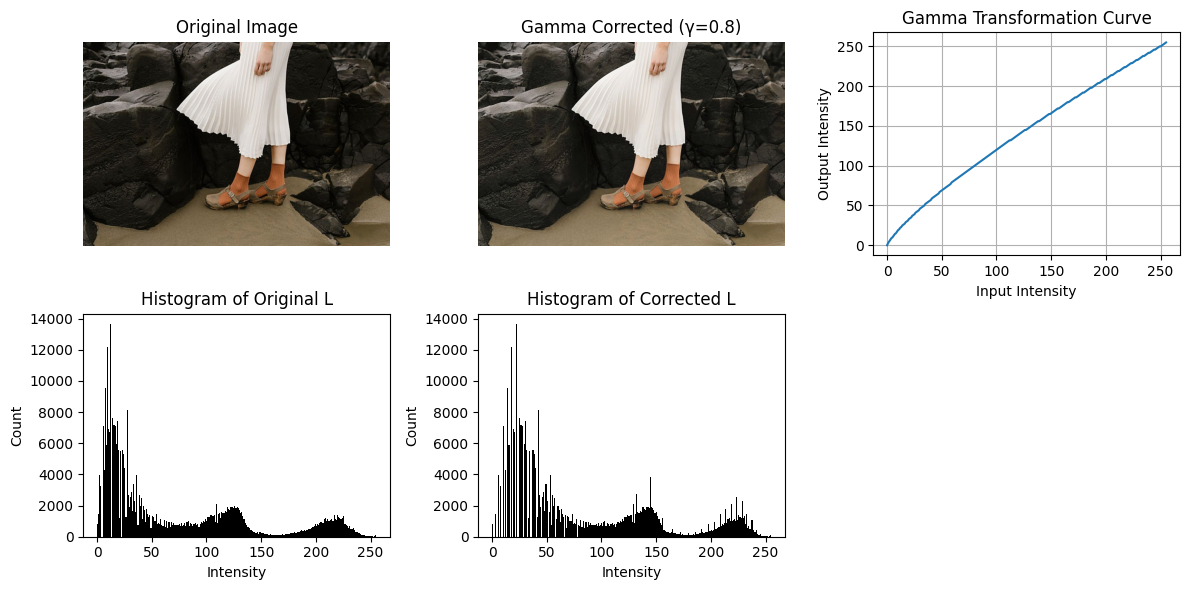

In [85]:

# ---- Parameters ----
gamma = 0.8                          # Change to your chosen gamma value
fname = "assets/highlights_and_shadows.jpg"              # Replace with your Fig.3 image path

# Load image ----
bgr = cv.imread(fname)
if bgr is None:
    raise FileNotFoundError(f"Could not open {fname}")

#  Convert to L*a*b* ----
lab = cv.cvtColor(bgr, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)

# Build LUT for gamma correction ----
lut = np.array([(i/255.0)**gamma * 255 for i in range(256)]).astype(np.uint8)

# Apply LUT to L channel ----
L_corrected = cv.LUT(L, lut)

# Merge channels back ----
lab_corrected = cv.merge((L_corrected, a, b))
bgr_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2BGR)

# Plot results ----
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.imshow(cv.cvtColor(bgr, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(cv.cvtColor(bgr_corrected, cv.COLOR_BGR2RGB))
plt.title(f"Gamma Corrected (γ={gamma})")
plt.axis('off')

# L channel histograms
plt.subplot(2,3,4)
plt.hist(L.ravel(), bins=256, range=(0,255), color='black')
plt.title("Histogram of Original L")
plt.xlabel("Intensity")
plt.ylabel("Count")

plt.subplot(2,3,5)
plt.hist(L_corrected.ravel(), bins=256, range=(0,255), color='black')
plt.title("Histogram of Corrected L")
plt.xlabel("Intensity")
plt.ylabel("Count")

# Transformation curve
plt.subplot(2,3,3)
plt.plot(np.arange(256), lut)
plt.title("Gamma Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)

plt.tight_layout()
plt.show()



# Question 4

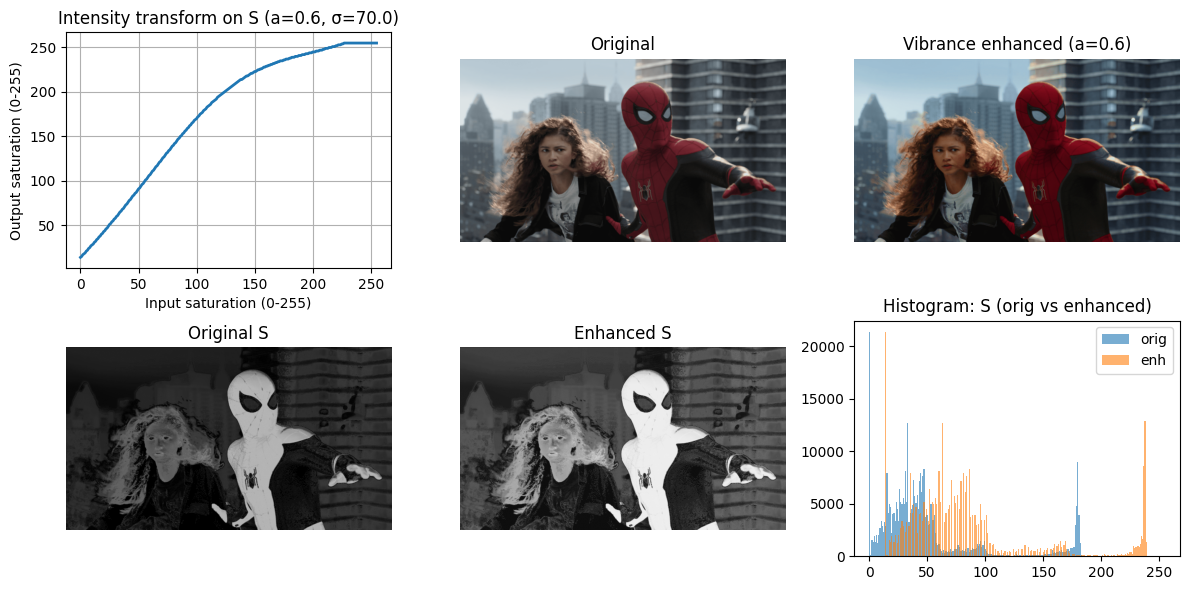

Saved: assets/fig4_vibrance_a0.60.png


In [86]:

# ---------- Parameters ----------
fname = "assets/spider.png"   # replace with your file's path
sigma = 70.0
a = 0.6            # initial choice for 'a' in [0,1]; tune this
save_out = True      # whether to save result image
outname = "assets/fig4_vibrance_a{:.2f}.png".format(a)

# ---------- Read image ----------
bgr = cv.imread(fname)
if bgr is None:
    raise FileNotFoundError(f"Could not open '{fname}'")

# Convert to HSV (OpenCV uses H:0-179, S:0-255, V:0-255)
hsv = cv.cvtColor(bgr, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

# ---------- Build LUT for S channel ----------
# Compute mapping for inputs 0..255
x = np.arange(256, dtype=np.float32)
bump = a * 128.0 * np.exp(-((x - 128.0) ** 2) / (2.0 * sigma ** 2))
mapped = x + bump
mapped = np.minimum(mapped, 255.0)
lut = mapped.astype(np.uint8)  # 256-length LUT

# ---------- Apply LUT to saturation plane and recombine ----------
s_enh = cv.LUT(s, lut)
hsv_enh = cv.merge((h, s_enh, v))
bgr_enh = cv.cvtColor(hsv_enh, cv.COLOR_HSV2BGR)

# ---------- Plotting ----------
plt.figure(figsize=(12,6))

# transformation curve
plt.subplot(2,3,1)
plt.plot(x, lut, lw=2)
plt.title(f"Intensity transform on S (a={a}, σ={sigma})")
plt.xlabel("Input saturation (0-255)")
plt.ylabel("Output saturation (0-255)")
plt.grid(True)

# Original image
plt.subplot(2,3,2)
plt.imshow(cv.cvtColor(bgr, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

# Enhanced image
plt.subplot(2,3,3)
plt.imshow(cv.cvtColor(bgr_enh, cv.COLOR_BGR2RGB))
plt.title(f"Vibrance enhanced (a={a})")
plt.axis('off')

# Show S channel (orig and enhanced) for inspection
plt.subplot(2,3,4)
plt.imshow(s, cmap='gray', vmin=0, vmax=255)
plt.title("Original S")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(s_enh, cmap='gray', vmin=0, vmax=255)
plt.title("Enhanced S")
plt.axis('off')

# Histogram comparison for S channel
plt.subplot(2,3,6)
plt.hist(s.ravel(), bins=256, range=(0,255), alpha=0.6, label='orig')
plt.hist(s_enh.ravel(), bins=256, range=(0,255), alpha=0.6, label='enh')
plt.legend()
plt.title("Histogram: S (orig vs enhanced)")

plt.tight_layout()
plt.show()

# ---------- Optional save ----------
if save_out:
    cv.imwrite(outname, bgr_enh)
    print("Saved:", outname)

# ---------- Helper: try multiple a values (quick preview loop) ----------
def preview_as(a_values=[0.2, 0.4, 0.6, 0.8]):
    previews = []
    for ai in a_values:
        bump = ai * 128.0 * np.exp(-((x - 128.0) ** 2) / (2.0 * sigma ** 2))
        lut_tmp = np.minimum(x + bump, 255.0).astype(np.uint8)
        s_tmp = cv.LUT(s, lut_tmp)
        hsv_tmp = cv.merge((h, s_tmp, v))
        bgr_tmp = cv.cvtColor(hsv_tmp, cv.COLOR_HSV2BGR)
        previews.append((ai, bgr_tmp))
    # show thumbnails
    plt.figure(figsize=(10,3))
    for i, (ai, imgp) in enumerate(previews):
        plt.subplot(1, len(previews), i+1)
        plt.imshow(cv.cvtColor(imgp, cv.COLOR_BGR2RGB))
        plt.title(f"a={ai}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call preview (uncomment if you want quick comparisons)
# preview_as([0.1, 0.3, 0.5, 0.7, 0.9])


# Question 5

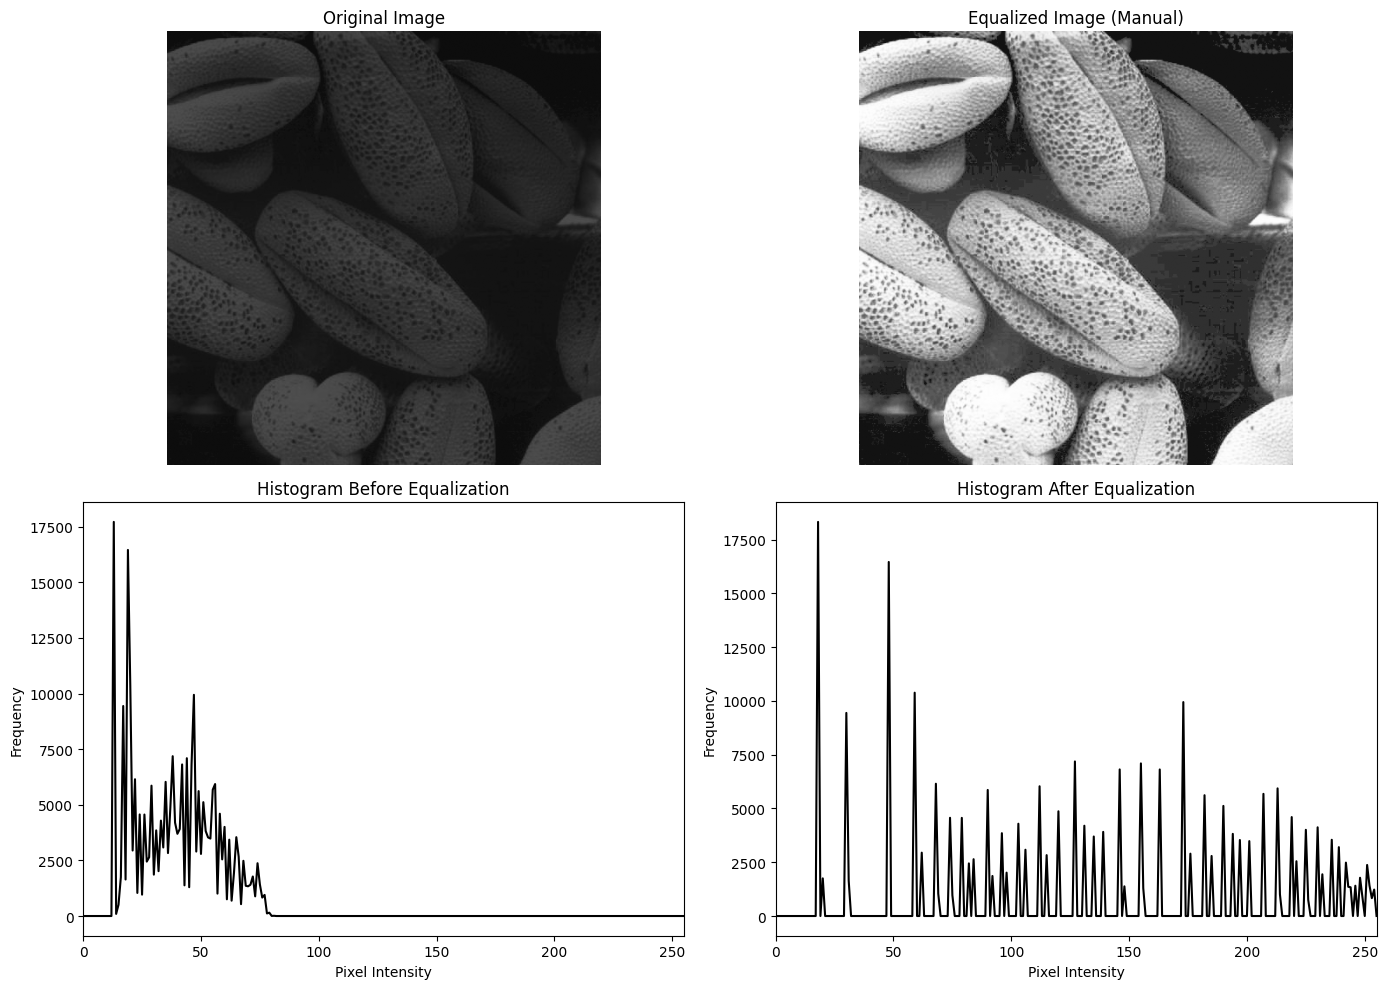

In [92]:

# Load grayscale image
f = cv.imread('assets/shells.tif', cv.IMREAD_GRAYSCALE)

M, N = f.shape

# Compute histogram before equalization
hist_before = np.zeros(256, dtype=int)
for i in range(M):
    for j in range(N):
        hist_before[f[i, j]] += 1

# Compute cumulative distribution function (CDF)
cdf = hist_before.cumsum()

# Normalize the CDF
L = 256

# Create the transformation function (mapping)
t = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)], dtype=np.uint8)

# Apply the transformation to get the equalized image
g = t[f]

# Compute histogram after equalization
hist_after = np.zeros(256, dtype=int)
for i in range(M):
    for j in range(N):
        hist_after[g[i, j]] += 1

# Plot images and histograms
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Original image
axs[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Equalized image
axs[0, 1].imshow(g, cmap='gray', vmin=0, vmax=255)
axs[0, 1].set_title('Equalized Image (Manual)')
axs[0, 1].axis('off')

# Histogram before equalization
axs[1, 0].plot(hist_before, color='black')
axs[1, 0].set_title('Histogram Before Equalization')
axs[1, 0].set_xlim([0, 255])
axs[1, 0].set_xlabel('Pixel Intensity')
axs[1, 0].set_ylabel('Frequency')

# Histogram after equalization
axs[1, 1].plot(hist_after, color='black')
axs[1, 1].set_title('Histogram After Equalization')
axs[1, 1].set_xlim([0, 255])
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



# Question 6

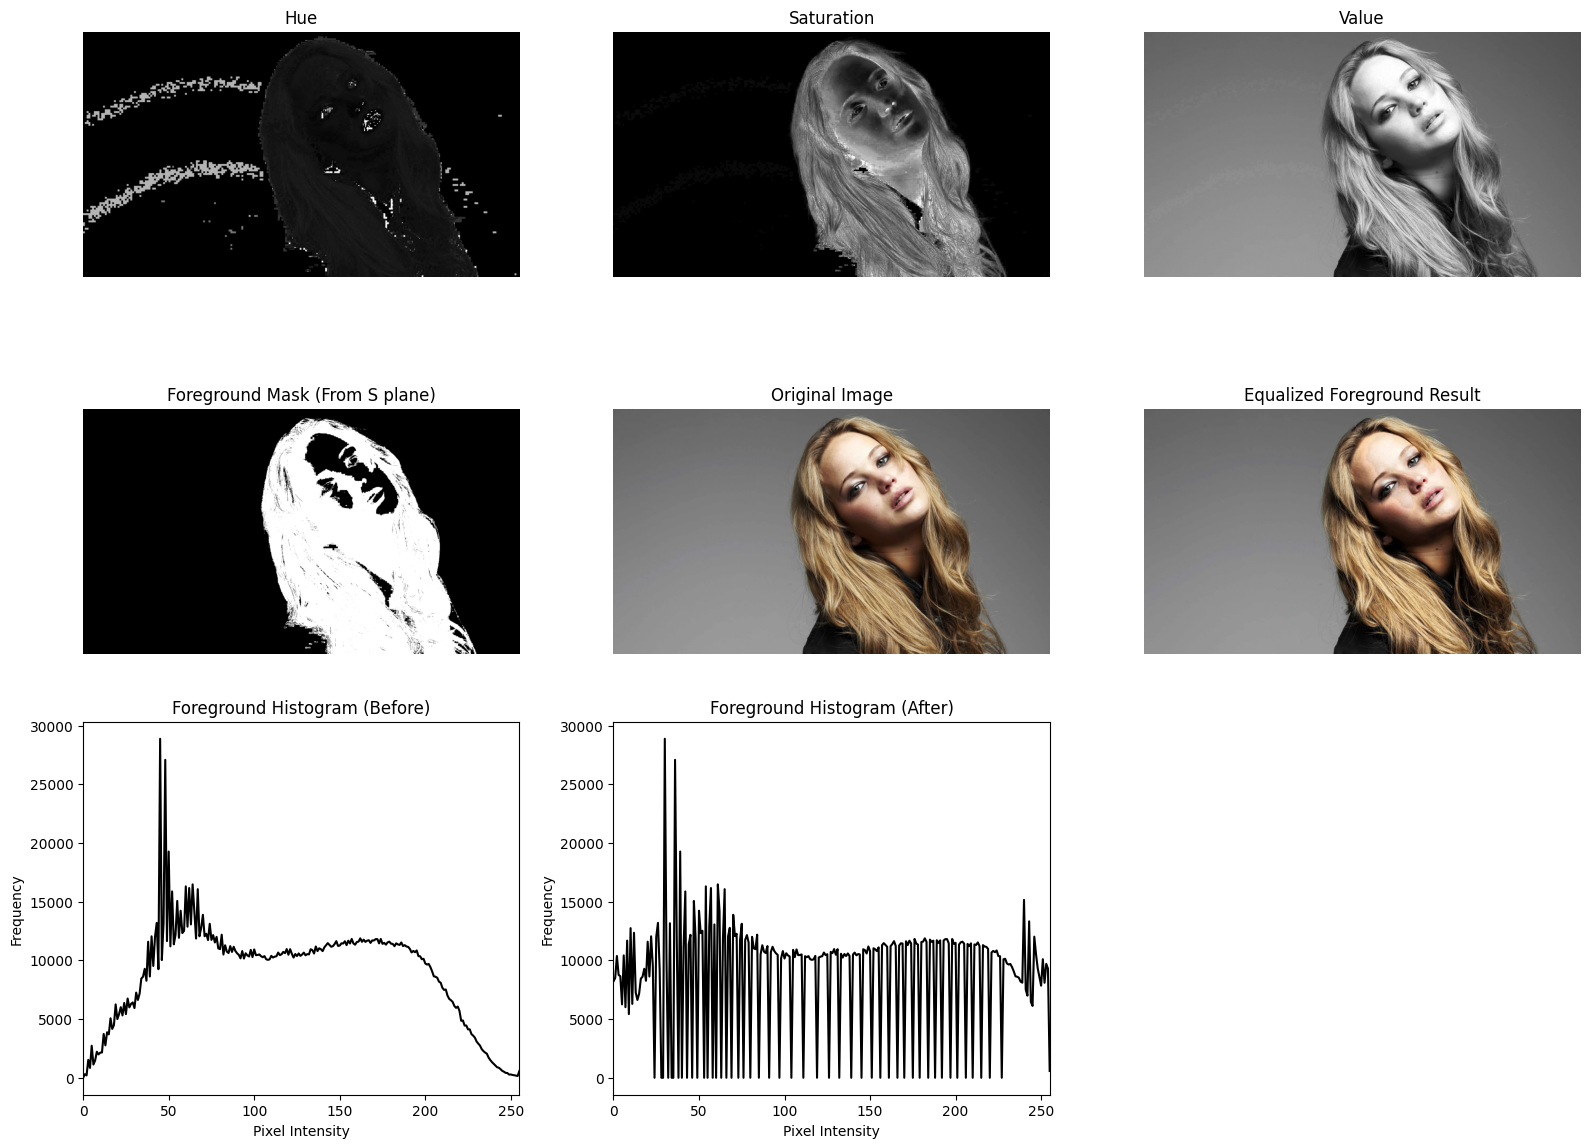

In [96]:

# Step (a) — Read image and convert to HSV
img = cv.imread('assets/jeniffer.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
H, S, V = cv.split(hsv)

# Step (b) — Threshold Saturation plane to get mask
_, mask = cv.threshold(S, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Step (c) — Extract foreground from Value plane using mask
foreground = cv.bitwise_and(V, V, mask=mask)

# Step (d) — Compute histogram of foreground
hist_before = cv.calcHist([foreground], [0], mask, [256], [0, 256]).flatten()

# Step (e) — Compute CDF and histogram equalize only foreground
cdf = np.cumsum(hist_before)
cdf_masked = np.ma.masked_equal(cdf, 0)  # ignore zeros
cdf_min = cdf_masked.min()
cdf_max = cdf_masked.max()

L = 256
cdf_eq = (cdf_masked - cdf_min) * (L - 1) / (cdf_max - cdf_min)
cdf_eq = np.ma.filled(cdf_eq, 0).astype(np.uint8)

# Apply mapping to foreground pixels
V_eq = V.copy()
V_eq[mask > 0] = cdf_eq[V[mask > 0]]

# Step (f) — Merge equalized foreground with background
hsv_eq = cv.merge([H, S, V_eq])
result = cv.cvtColor(hsv_eq, cv.COLOR_HSV2BGR)

# Histogram after equalization (foreground only)
foreground_eq = cv.bitwise_and(V_eq, V_eq, mask=mask)
hist_after = cv.calcHist([foreground_eq], [0], mask, [256], [0, 256]).flatten()

# Display all required outputs
fig, axs = plt.subplots(3, 3, figsize=(16, 12))

# HSV planes
axs[0, 0].imshow(H, cmap='gray')
axs[0, 0].set_title('Hue')
axs[0, 0].axis('off')

axs[0, 1].imshow(S, cmap='gray')
axs[0, 1].set_title('Saturation')
axs[0, 1].axis('off')

axs[0, 2].imshow(V, cmap='gray')
axs[0, 2].set_title('Value')
axs[0, 2].axis('off')

# Mask, Original, and Result
axs[1, 0].imshow(mask, cmap='gray')
axs[1, 0].set_title('Foreground Mask (From S plane)')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[1, 1].set_title('Original Image')
axs[1, 1].axis('off')

axs[1, 2].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
axs[1, 2].set_title('Equalized Foreground Result')
axs[1, 2].axis('off')

# Histograms before and after (foreground only)
axs[2, 0].plot(hist_before, color='black')
axs[2, 0].set_title('Foreground Histogram (Before)')
axs[2, 0].set_xlim([0, 255])
axs[2, 0].set_xlabel('Pixel Intensity')
axs[2, 0].set_ylabel('Frequency')

axs[2, 1].plot(hist_after, color='black')
axs[2, 1].set_title('Foreground Histogram (After)')
axs[2, 1].set_xlim([0, 255])
axs[2, 1].set_xlabel('Pixel Intensity')
axs[2, 1].set_ylabel('Frequency')

axs[2, 2].axis('off')  # Empty slot for symmetry

plt.tight_layout()
plt.show()



# Question 7

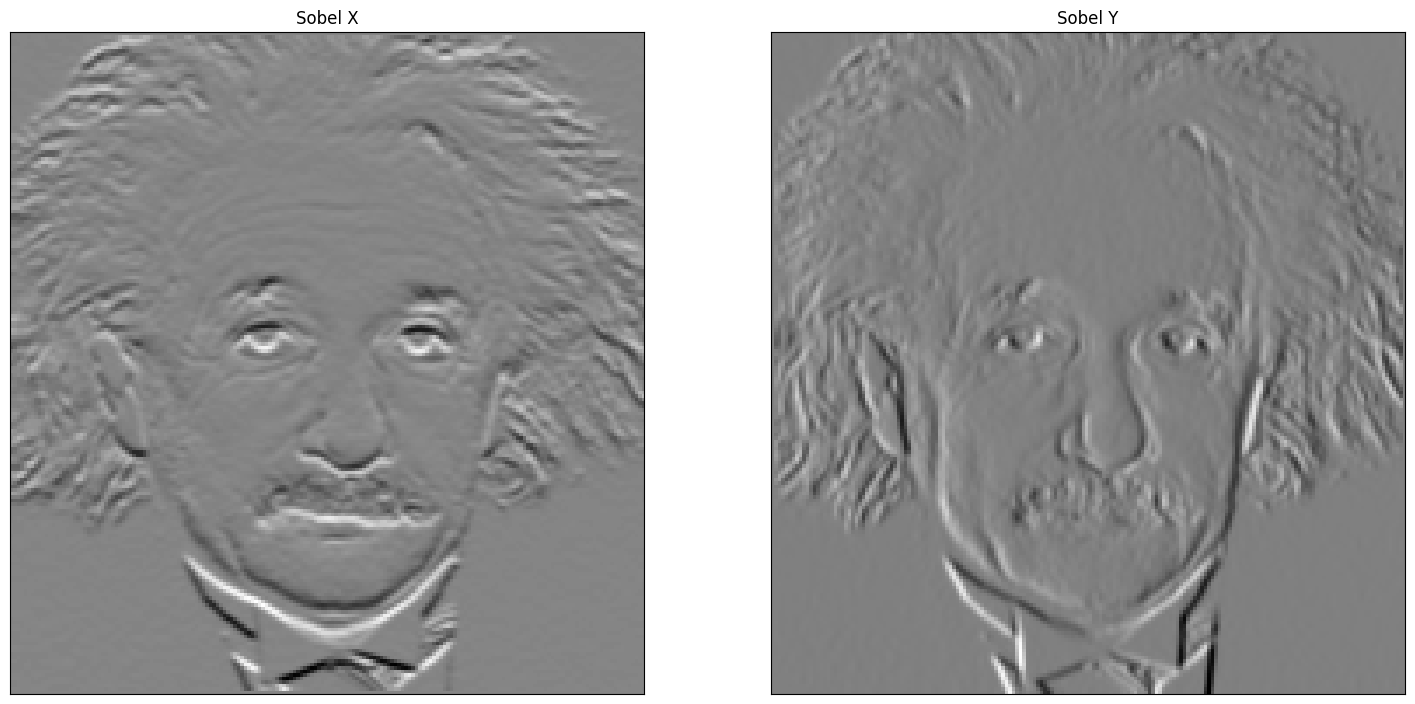

In [102]:

im = cv.imread('assets/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
im_x = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im, cv.CV_64F, sobel_y)
fig, ax = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()


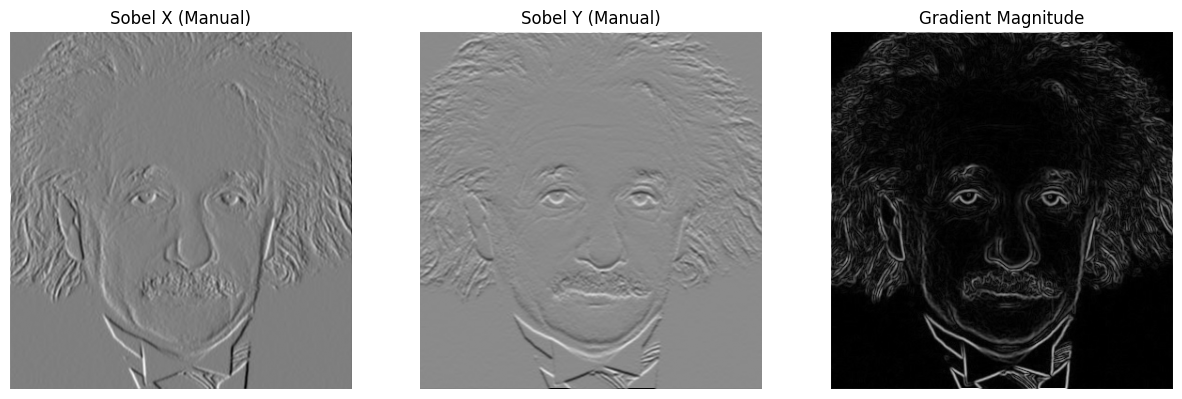

In [103]:

def sobel_filter_manual(image):
    # Sobel kernels
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)

    Ky = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=np.float32)

    rows, cols = image.shape
    # Pad image with 1 pixel border (zeros)
    padded = np.pad(image, ((1,1),(1,1)), mode='constant')

    Gx = np.zeros_like(image, dtype=np.float32)
    Gy = np.zeros_like(image, dtype=np.float32)

    # Convolution
    for i in range(rows):
        for j in range(cols):
            region = padded[i:i+3, j:j+3]
            Gx[i, j] = np.sum(Kx * region)
            Gy[i, j] = np.sum(Ky * region)

    # Compute gradient magnitude
    magnitude = np.sqrt(Gx**2 + Gy**2)
    # Normalize to 0-255 and convert to uint8
    magnitude = (magnitude / magnitude.max()) * 255
    magnitude = magnitude.astype(np.uint8)

    return Gx, Gy, magnitude

# Load grayscale image (change path as needed)
img = cv.imread('assets/einstein.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Image not found!"

Gx, Gy, mag = sobel_filter_manual(img)

# Show results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(Gx, cmap='gray')
plt.title('Sobel X (Manual)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(Gy, cmap='gray')
plt.title('Sobel Y (Manual)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(mag, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.show()


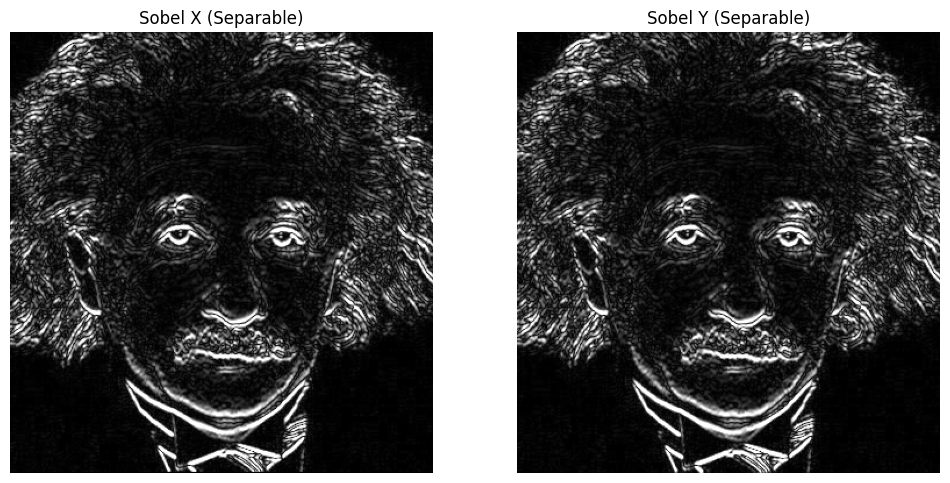

In [107]:

# Load grayscale image
img = cv.imread('assets/einstein.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Image not found!"

# Define 1D kernels for Sobel X
Kx_v = np.array([[1], [2], [1]], dtype=np.float32)   # Vertical kernel (3x1)
Kx_h = np.array([1, 0, -1], dtype=np.float32)       # Horizontal kernel (1x3)

# Define 1D kernels for Sobel Y
Ky_v = np.array([[1], [0], [-1]], dtype=np.float32)  # Vertical kernel (3x1)
Ky_h = np.array([1, 2, 1], dtype=np.float32)         # Horizontal kernel (1x3)

# Sobel X: vertical then horizontal convolution
intermediate_x = cv.filter2D(img, cv.CV_32F, Kx_v)
sobel_x = cv.filter2D(intermediate_x, cv.CV_32F, Kx_h)

# Sobel Y: vertical then horizontal convolution
intermediate_y = cv.filter2D(img, cv.CV_32F, Ky_v)
sobel_y = cv.filter2D(intermediate_y, cv.CV_32F, Ky_h)

# Convert to absolute values for display
sobel_x_abs = cv.convertScaleAbs(sobel_x)
sobel_y_abs = cv.convertScaleAbs(sobel_y)

# Plot results
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(sobel_x_abs, cmap='gray')
plt.title('Sobel X (Separable)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sobel_y_abs, cmap='gray')
plt.title('Sobel Y (Separable)')
plt.axis('off')

plt.show()

